In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Desktop\processed_data.csv")
df.head()

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35_44,Female,ProfessionalCert,UK,WhiteAsian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25_34,Male,Doctorate,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35_44,Male,ProfessionalCert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18_24,Female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35_44,Female,Doctorate,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [10]:
x=df[['Nscore','Escore','Oscore','Ascore','Cscore']].values
x[0:5]

array([[ 0.31287, -0.57545, -0.58331, -0.91699, -0.00665],
       [-0.67825,  1.93886,  1.43533,  0.76096, -0.14277],
       [-0.46725,  0.80523, -0.84732, -1.6209 , -1.0145 ],
       [-0.14882, -0.80615, -0.01928,  0.59042,  0.58489],
       [ 0.73545, -1.6334 , -0.45174, -0.30172,  1.30612]])

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Alcohol_encoded=le.fit_transform(df.Alcohol)
Amphet_encoded=le.fit_transform(df.Amphet)
Amyl_encoded=le.fit_transform(df.Amyl)
Benzos_encoded=le.fit_transform(df.Benzos)
Caff_encoded=le.fit_transform(df.Caff)
Cannabis_encoded=le.fit_transform(df.Cannabis)
Choc_encoded=le.fit_transform(df.Choc)
Coke_encoded=le.fit_transform(df.Coke)
Crack_encoded=le.fit_transform(df.Crack)
Ecstasy_encoded=le.fit_transform(df.Ecstasy)
Heroin_encoded=le.fit_transform(df.Heroin)
Ketamine_encoded=le.fit_transform(df.Ketamine)
Legalh_encoded=le.fit_transform(df.Legalh)
LSD_encoded=le.fit_transform(df.LSD)
Meth_encoded=le.fit_transform(df.Meth)
Mushrooms_encoded=le.fit_transform(df.Mushrooms)
Nicotine_encoded=le.fit_transform(df.Nicotine)
Semer_encoded=le.fit_transform(df.Semer)
VSA_encoded=le.fit_transform(df.VSA)

In [8]:
print("Alcohol labels:",Alcohol_encoded[0:5])
print("Amphet labels:",Amphet_encoded[0:5])
print("Amyl labels:",Amyl_encoded[0:5])
print("Benzos labels:",Benzos_encoded[0:5])
print("Caff labels:",Caff_encoded[0:5])
print("Cannabis labels:",Cannabis_encoded[0:5])
print("Choc labels:",Choc_encoded[0:5])
print("Crack labels:",Crack_encoded[0:5])
print("Ecstasy labels:",Ecstasy_encoded[0:5])
print("Heroin labels:",Heroin_encoded[0:5])
print("Ketamine labels:",Ketamine_encoded[0:5])
print("Legalh labels:",Legalh_encoded[0:5])
print("LSD labels:",LSD_encoded[0:5])
print("Meth labels:",Meth_encoded[0:5])
print("Mushrooms labels:",Mushrooms_encoded[0:5])
print("Nicotine labels:",Nicotine_encoded[0:5])
print("Semer labels:",Semer_encoded[0:5])
print("VSA labels:",VSA_encoded[0:5])




Alcohol labels: [5 5 6 4 4]
Amphet labels: [2 2 0 0 1]
Amyl labels: [0 2 0 0 1]
Benzos labels: [2 0 0 3 0]
Caff labels: [6 6 6 5 6]
Cannabis labels: [0 4 3 2 3]
Choc labels: [5 6 4 4 6]
Crack labels: [0 0 0 0 0]
Ecstasy labels: [0 4 0 0 1]
Heroin labels: [0 0 0 0 0]
Ketamine labels: [0 2 0 2 0]
Legalh labels: [0 0 0 0 1]
LSD labels: [0 2 0 0 0]
Meth labels: [0 3 0 0 0]
Mushrooms labels: [0 0 1 0 2]
Nicotine labels: [2 4 0 2 2]
Semer labels: [0 0 0 0 0]
VSA labels: [0 0 0 0 0]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,Alcohol_encoded,test_size=0.2,random_state=4)
print('Train set size:',X_train.shape,y_train.shape)
print('Test set size:',X_test.shape,y_test.shape)

Train set size: (1508, 5) (1508,)
Test set size: (377, 5) (377,)


In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.27055703, 0.18037135, 0.22281167, 0.27320955, 0.27586207,
       0.31299735, 0.31564987, 0.30769231, 0.29442971])

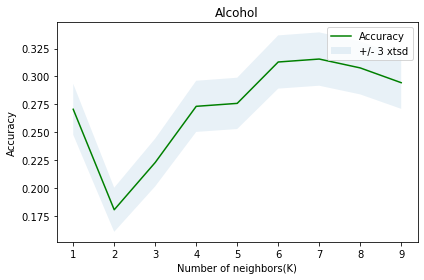

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Alcohol")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [15]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Alcohol_accuracy=mean_acc.max()
k1=mean_acc.argmax()+1

The best accuracy 0.3156498673740053 with K= 7


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,Amphet_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc


array([0.38196286, 0.44562334, 0.46949602, 0.47480106, 0.4801061 ,
       0.47480106, 0.47745358, 0.48275862, 0.47745358])

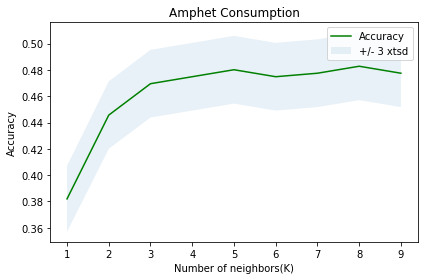

In [17]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Amphet Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [18]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Amphet_accuracy=mean_acc.max()
k2=mean_acc.argmax()+1

The best accuracy 0.4827586206896552 with K= 8


In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,Amyl_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc


array([0.50132626, 0.62068966, 0.61538462, 0.62334218, 0.64986737,
       0.65782493, 0.66843501, 0.66843501, 0.67374005])

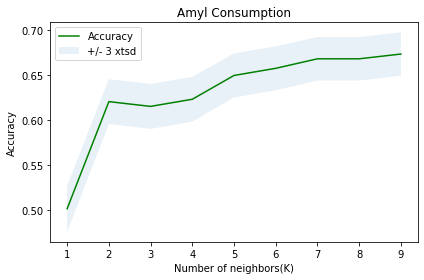

In [14]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Amyl Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [20]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Amyl_accuracy=mean_acc.max()
k3=mean_acc.argmax()+1

The best accuracy 0.6737400530503979 with K= 9


In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,Benzos_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.37665782, 0.50132626, 0.52519894, 0.50928382, 0.52254642,
       0.53580902, 0.5198939 , 0.52254642, 0.53580902])

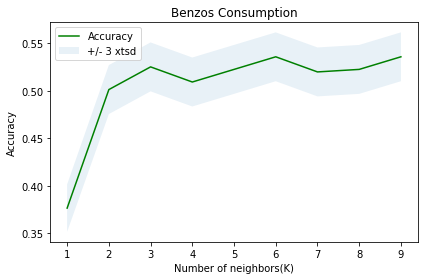

In [17]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Benzos Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [22]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Benzos_accuracy=mean_acc.max()
k4=mean_acc.argmax()+1

The best accuracy 0.5358090185676393 with K= 6


In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,Caff_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.52519894, 0.43766578, 0.59416446, 0.62334218, 0.64986737,
       0.66578249, 0.66843501, 0.67639257, 0.68169761])

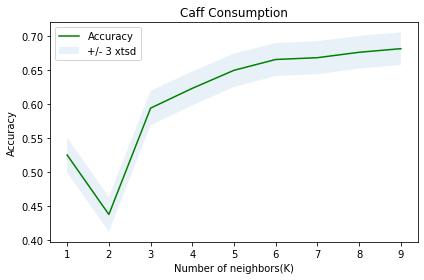

In [21]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Caff Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [24]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Caff_accuracy=mean_acc.max()
k5=mean_acc.argmax()+1

The best accuracy 0.6816976127320955 with K= 9


In [25]:
X_train,X_test,y_train,y_test=train_test_split(x,Cannabis_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.24668435, 0.22811671, 0.26525199, 0.25729443, 0.27320955,
       0.29973475, 0.30503979, 0.29177719, 0.30503979])

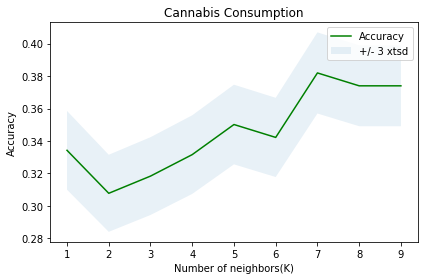

In [27]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Cannabis Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [26]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Cannabis_accuracy=mean_acc.max()
k6=mean_acc.argmax()+1

The best accuracy 0.3050397877984085 with K= 7


In [27]:
X_train,X_test,y_train,y_test=train_test_split(x,Choc_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.33421751, 0.30769231, 0.31830239, 0.33156499, 0.35013263,
       0.34217507, 0.38196286, 0.37400531, 0.37400531])

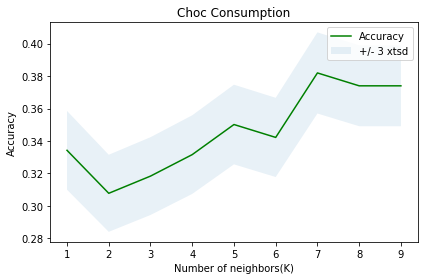

In [28]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Choc Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [28]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Choc_accuracy=mean_acc.max()
k7=mean_acc.argmax()+1

The best accuracy 0.3819628647214854 with K= 7


In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,Coke_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.41909814, 0.54376658, 0.5464191 , 0.54111406, 0.55437666,
       0.55702918, 0.56763926, 0.58090186, 0.5862069 ])

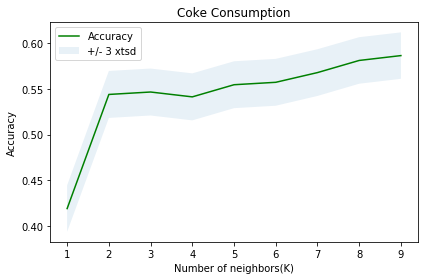

In [36]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Coke Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [30]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Coke_accuracy=mean_acc.max()
k8=mean_acc.argmax()+1

The best accuracy 0.5862068965517241 with K= 9


In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,Crack_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.74270557, 0.87798408, 0.85941645, 0.88328912, 0.88859416,
       0.8938992 , 0.8938992 , 0.8938992 , 0.89124668])

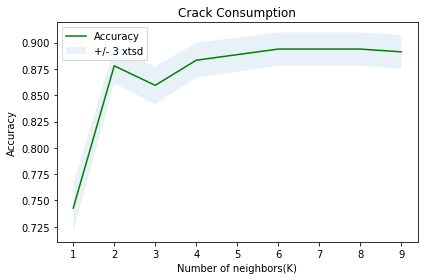

In [39]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Crack Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [32]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Crack_accuracy=mean_acc.max()
k9=mean_acc.argmax()+1

The best accuracy 0.8938992042440318 with K= 6


In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,Ecstasy_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.43766578, 0.52254642, 0.52254642, 0.52785146, 0.52254642,
       0.54376658, 0.54111406, 0.56233422, 0.56233422])

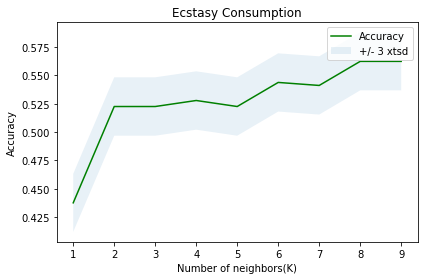

In [42]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Ecstasy Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [34]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Ecstasy_accuracy=mean_acc.max()
k10=mean_acc.argmax()+1

The best accuracy 0.5623342175066313 with K= 8


In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,Heroin_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.71883289, 0.84350133, 0.84880637, 0.85941645, 0.86737401,
       0.87002653, 0.86737401, 0.87798408, 0.88328912])

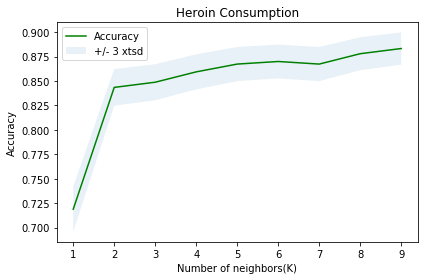

In [45]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Heroin Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [36]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Heroin_accuracy=mean_acc.max()
k11=mean_acc.argmax()+1

The best accuracy 0.883289124668435 with K= 9


In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,Ketamine_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.64986737, 0.77188329, 0.76392573, 0.78779841, 0.79310345,
       0.80371353, 0.80371353, 0.80636605, 0.80371353])

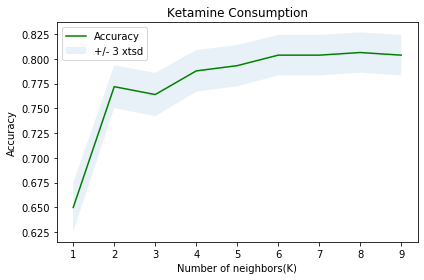

In [48]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Ketamine Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [38]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Ketamine_accuracy=mean_acc.max()
k12=mean_acc.argmax()+1

The best accuracy 0.8063660477453581 with K= 8


In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,Legalh_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.47745358, 0.54907162, 0.56763926, 0.57559682, 0.57029178,
       0.57824934, 0.57559682, 0.58090186, 0.58885942])

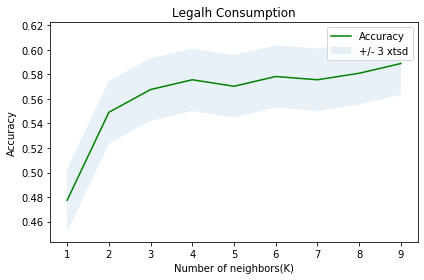

In [52]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Legalh Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [40]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Legalh_accuracy=mean_acc.max()
k13=mean_acc.argmax()+1

The best accuracy 0.5888594164456233 with K= 9


In [41]:
X_train,X_test,y_train,y_test=train_test_split(x,LSD_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.41644562, 0.51193634, 0.52254642, 0.55702918, 0.56233422,
       0.57029178, 0.56498674, 0.5862069 , 0.57824934])

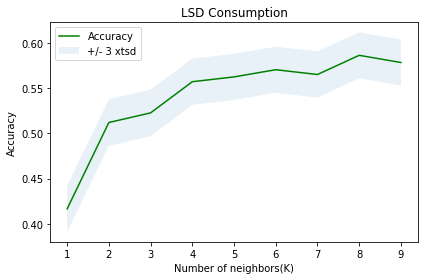

In [56]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("LSD Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [42]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
LSD_accuracy=mean_acc.max()
k14=mean_acc.argmax()+1

The best accuracy 0.5862068965517241 with K= 8


In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,Meth_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.65251989, 0.75331565, 0.77188329, 0.77718833, 0.76392573,
       0.76392573, 0.76923077, 0.76657825, 0.77188329])

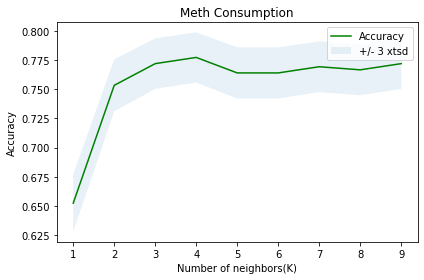

In [59]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Meth Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [44]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Meth_accuracy=mean_acc.max()
k15=mean_acc.argmax()+1

The best accuracy 0.7771883289124668 with K= 4


In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,Mushrooms_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.4137931 , 0.49867374, 0.49867374, 0.50928382, 0.54111406,
       0.5464191 , 0.55172414, 0.55172414, 0.56233422])

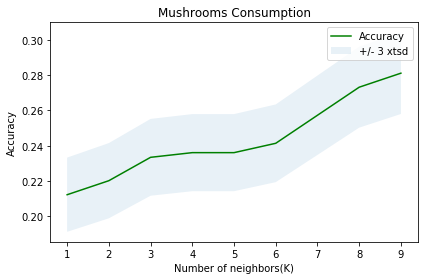

In [66]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Mushrooms Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [46]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Mushrooms_accuracy=mean_acc.max()
k16=mean_acc.argmax()+1

The best accuracy 0.5623342175066313 with K= 9


In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,Nicotine_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.21220159, 0.22015915, 0.23342175, 0.23607427, 0.23607427,
       0.24137931, 0.25729443, 0.27320955, 0.28116711])

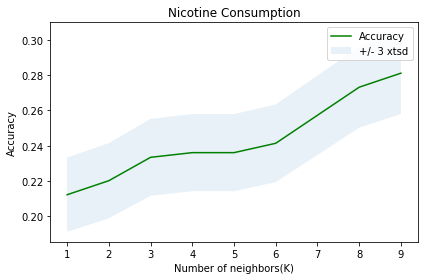

In [69]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Nicotine Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [48]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Nicotine_accuracy=mean_acc.max()
k17=mean_acc.argmax()+1

The best accuracy 0.28116710875331563 with K= 9


In [49]:
X_train,X_test,y_train,y_test=train_test_split(x,Semer_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.98408488, 0.99469496, 0.99469496, 0.99469496, 0.99469496,
       0.99469496, 0.99469496, 0.99469496, 0.99469496])

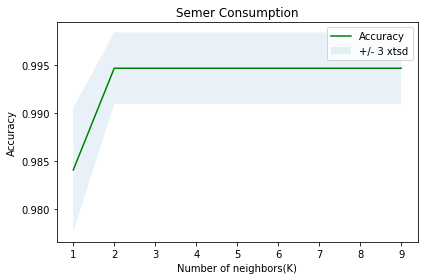

In [72]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("Semer Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [50]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
Semer_accuracy=mean_acc.max()
k18=mean_acc.argmax()+1

The best accuracy 0.9946949602122016 with K= 2


In [51]:
X_train,X_test,y_train,y_test=train_test_split(x,VSA_encoded,test_size=0.2,random_state=4)
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
confusionMx=[]
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.6127321 , 0.71087533, 0.73474801, 0.74005305, 0.74005305,
       0.74535809, 0.75331565, 0.76127321, 0.76127321])

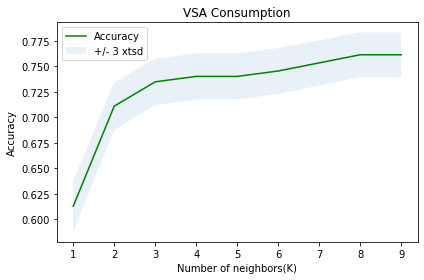

In [75]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.title("VSA Consumption")
plt.legend(('Accuracy','+/- 3 xtsd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.tight_layout()
plt.show()

In [52]:
print("The best accuracy",mean_acc.max(),"with K=",mean_acc.argmax()+1)
VSA_accuracy=mean_acc.max()
k19=mean_acc.argmax()+1

The best accuracy 0.7612732095490716 with K= 8


In [53]:
data={"Drug name":["Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine",
                   "Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"],
     "Accuracy":[Alcohol_accuracy,Amphet_accuracy,Amyl_accuracy,Benzos_accuracy,Caff_accuracy,Cannabis_accuracy,
                 Choc_accuracy,Coke_accuracy,Crack_accuracy,Ecstasy_accuracy,Heroin_accuracy,Ketamine_accuracy,
                 Legalh_accuracy,LSD_accuracy,Meth_accuracy,Mushrooms_accuracy,Nicotine_accuracy,Semer_accuracy,VSA_accuracy],
     "K":[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19]}

df=pd.DataFrame(data)

In [54]:
df.head()

,Drug name,Accuracy,K
0,Alcohol,0.315650,7
1,Amphet,0.482759,8
2,Amyl,0.673740,9
3,Benzos,0.535809,6
4,Caff,0.681698,9


In [55]:
df.round(2)

,Drug name,Accuracy,K
0,Alcohol,0.32,7
1,Amphet,0.48,8
2,Amyl,0.67,9
3,Benzos,0.54,6
4,Caff,0.68,9
5,Cannabis,0.31,7
6,Choc,0.38,7
7,Coke,0.59,9
8,Crack,0.89,6
9,Ecstasy,0.56,8


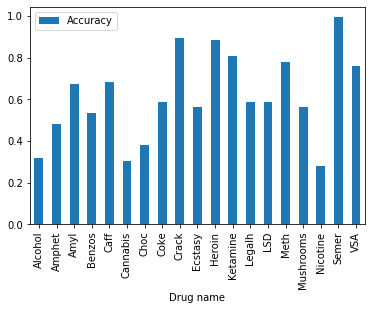

In [56]:
labels=df[['Drug name','Accuracy']]
labels.set_index('Drug name').plot(kind='bar')

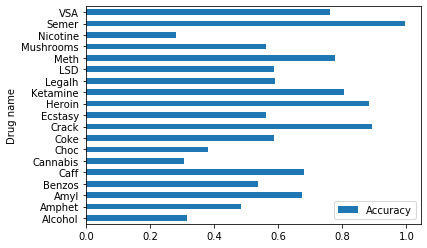

In [57]:
labels.set_index('Drug name').plot(kind='barh')

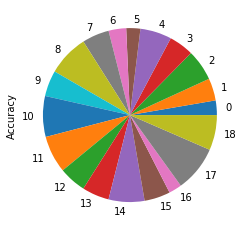

In [58]:
labels['Accuracy'].plot(kind='pie')

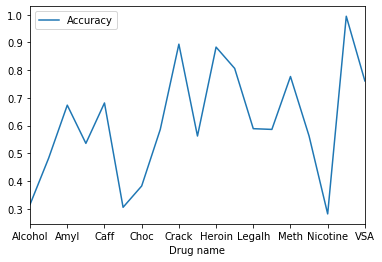

In [59]:
labels.set_index('Drug name').plot(kind='line')

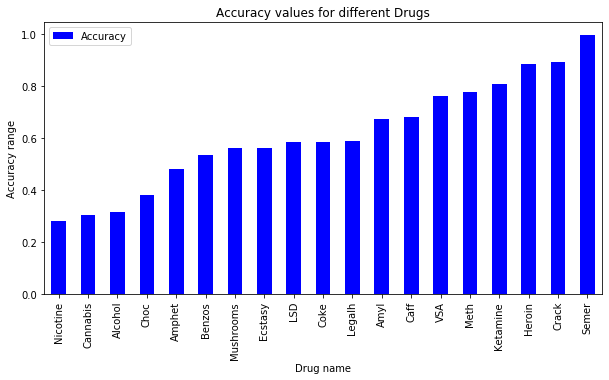

In [72]:
labels1=df[['Drug name','Accuracy']].sort_values(by='Accuracy',ascending=True)
import matplotlib.pyplot as plt
index=labels1.set_index('Drug name',inplace=True)
labels1.plot(kind='bar',figsize=(10,5),color='blue')
plt.ylabel("Accuracy range")
plt.title("Accuracy values for different Drugs")
plt.show()




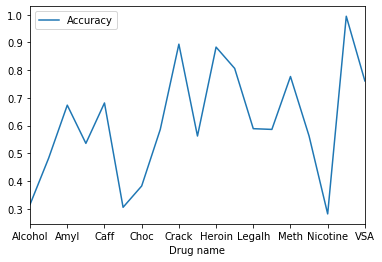

In [95]:
labels.set_index('Drug name').plot(kind='line')


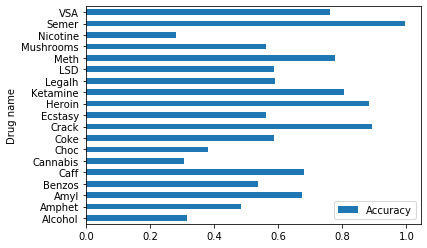

In [96]:
labels.set_index('Drug name').plot(kind='barh')

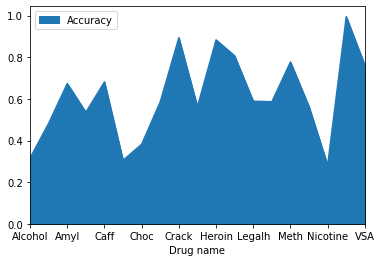

In [98]:
labels.set_index('Drug name').plot(kind='area')